In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('titanic.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [20]:
df.shape

(891, 12)

In [21]:
df.info()      # will get both numeric and non_numeric values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df.describe(include='all')     # will get only numeric values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [23]:
#unique values in survived column
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [24]:
#unique values in pclass column
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [25]:
#checking for null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
#as around 77% values are null in cabin column we drop it
df.drop('Cabin',   axis=1,  inplace=True)
df.shape

(891, 11)

In [27]:
#checking mode in embarked columns
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [28]:
#replacing null values in embarked column
df['Embarked'].fillna('S', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2220\60860132.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [29]:
#calculating average age of each class
avg_1_age = np.mean(df['Age'][df['Pclass']==1])
avg_2_age = np.mean(df['Age'][df['Pclass']==2])
avg_3_age = np.mean(df['Age'][df['Pclass']==3])
avg_3_age


25.14061971830986

In [30]:
#creating afunction to replace null values in age column with respectto class
def fillage(dtf):
    x = dtf[0]
    y = dtf[1]
    if pd.isna(x):
        if y == 1:
            return avg_1_age
        elif y == 2:
             return avg_2_age
        else:
            return avg_3_age
    else:
       return x
        
        

In [31]:
df['Age'] = df[['Age','Pclass']].apply(fillage, axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2220\3325904112.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = dtf[0]
C:\Users\Admin\AppData\Local\Temp\ipykernel_2220\3325904112.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = dtf[1]


In [32]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [33]:
df.duplicated().sum()

0

In [34]:
##USING VISUALIZATION


In [35]:
#show male and female counts using bar graph
gender_count = df['Sex'].value_counts()
gender_count

Sex
male      577
female    314
Name: count, dtype: int64

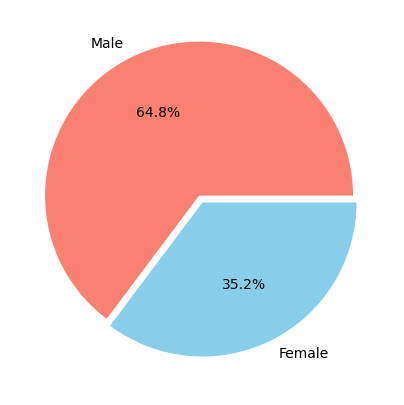

In [36]:
fig = plt.figure(figsize=(5,5))
plt.pie(gender_count.values,labels=['Male','Female'],autopct='%0.1f%%',colors=['salmon','skyblue'],
        explode=[0.05,0])
plt.show()

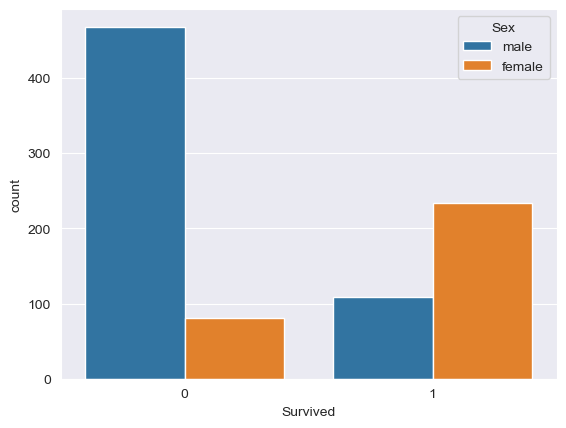

In [37]:
#CLUSTERED GRAPH
#find gender wise bifircationof survived and dead
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=df)
plt.show()

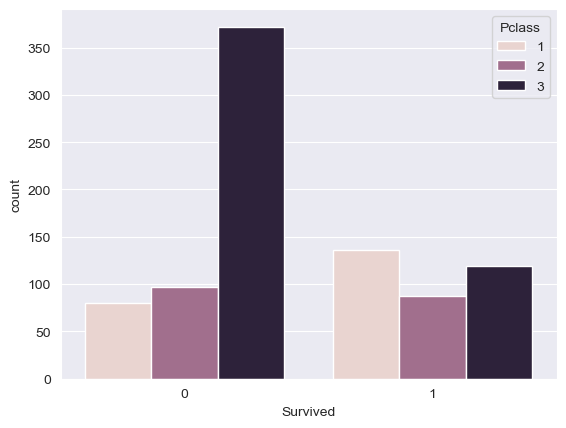

In [38]:
#find gender wise bifircationof pclass
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.show()

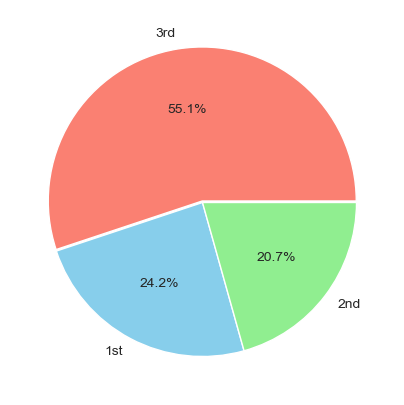

In [39]:
class_divide = df['Pclass'].value_counts()
fig = plt.figure(figsize=(5,5))
plt.pie(class_divide.values,labels=['3rd','1st','2nd'],autopct='%0.1f%%',
        colors=['salmon','skyblue','lightgreen'], explode=[0.01,0,0])
plt.show()

In [40]:
#calculting average fare of each class
avg_1_fare = np.mean(df['Fare'][df['Pclass']==1])
avg_2_fare= np.mean(df['Fare'][df['Pclass']==2])
avg_3_fare= np.mean(df['Fare'][df['Pclass']==3])

In [41]:
#or

In [42]:
fares= df.groupby('Pclass')['Fare'].mean()
fares.index

Index([1, 2, 3], dtype='int64', name='Pclass')

In [43]:
fares = [avg_1_fare, avg_2_fare, avg_3_fare]
fares

[84.1546875, 20.662183152173913, 13.675550101832993]

In [44]:
#or
avg_fares=[]
for i in df['Pclass'].unique():
    avg_fares.append(np.mean(df[df['Pclass']==i].Fare))

In [45]:
fares = [avg_1_fare, avg_2_fare, avg_3_fare]
fares

[84.1546875, 20.662183152173913, 13.675550101832993]

TypeError: 'str' object is not callable

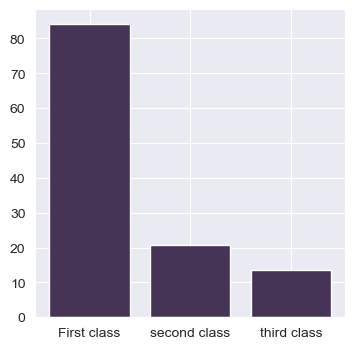

In [46]:
plt.figure(figsize=(4,4))
plt.bar(['First class','second class','third class'],fares,color='#453456')
plt.xlabel('classes on titanic')
plt.ylabel('avg fare per class')
plt.show()

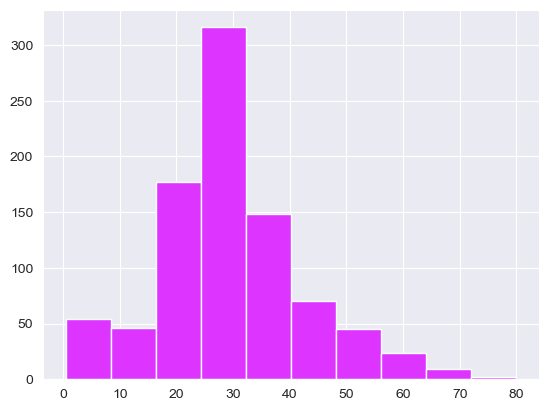

In [57]:
#Distribution of age
plt.hist(df['Age'],bins=10,color='#dd35ff')
plt.show()

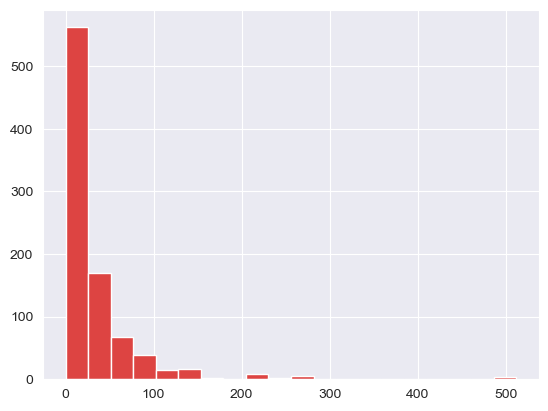

In [59]:
plt.hist(df['Fare'],bins=20,color='#dd4442')
plt.show()

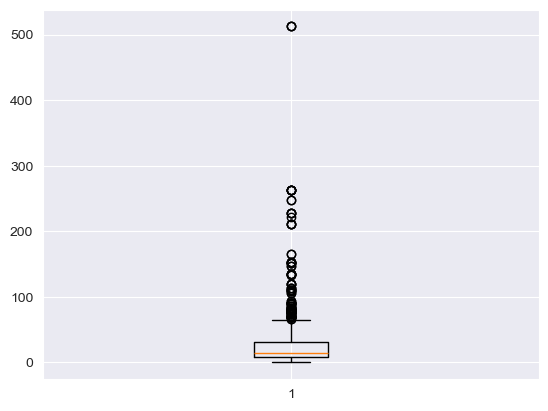

In [61]:
plt.boxplot(df['Fare'])
plt.show()

TypeError: 'str' object is not callable

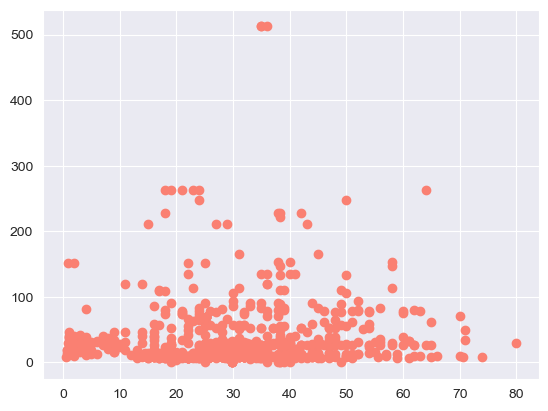

In [55]:
#scatter plot
#relationship between age and fare
plt.scatter(df['Age'],df['Fare'], color = 'salmon')
plt.xlabel('Age of passengers')
plt.ylabel('Fare ofvoyage')
plt.show()

TypeError: 'str' object is not callable

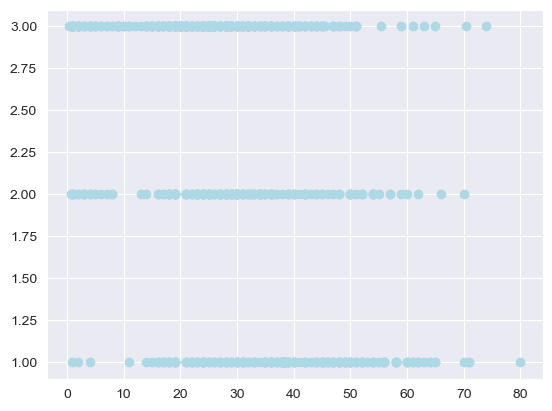

In [63]:
#relationship between pclass and age
plt.scatter(df['Age'],df['Pclass'],color = 'lightblue')
plt.xlabel('Age of passengers')
plt.ylabel('Pclass')
plt.show()